Porcentagem de dados faltantes por coluna:
 Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64
Estatísticas Descritivas de Age:
count    125.000000
mean      37.208000
std        8.532949
min       25.000000
25%       30.000000
50%       35.000000
75%       44.000000
max       53.000000
Name: Age, dtype: float64


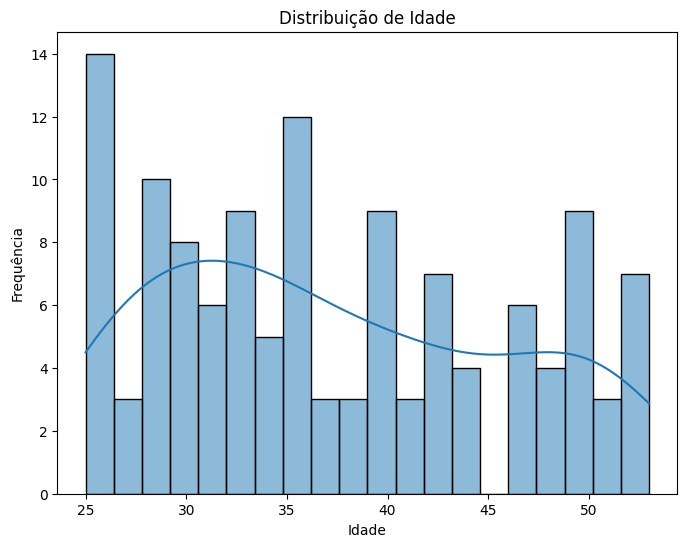

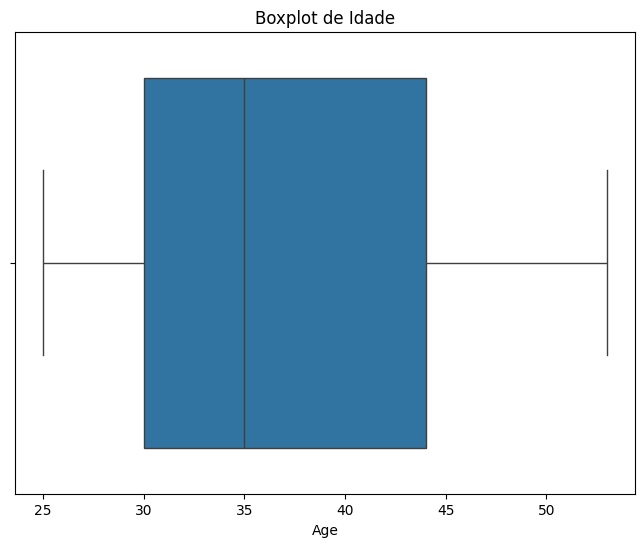

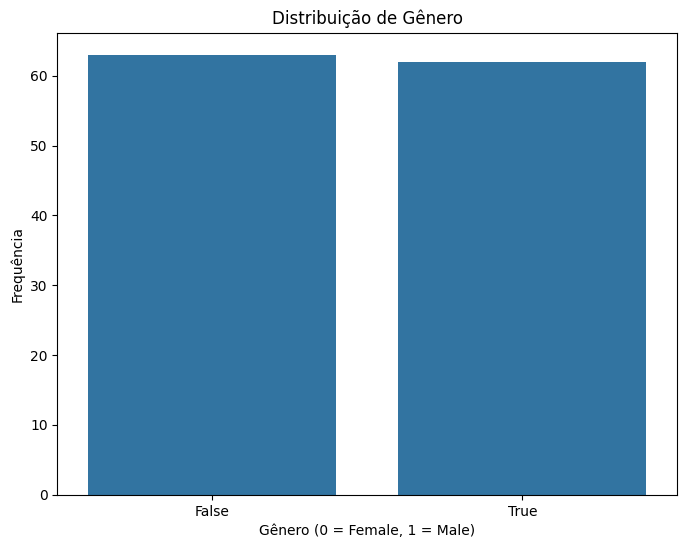

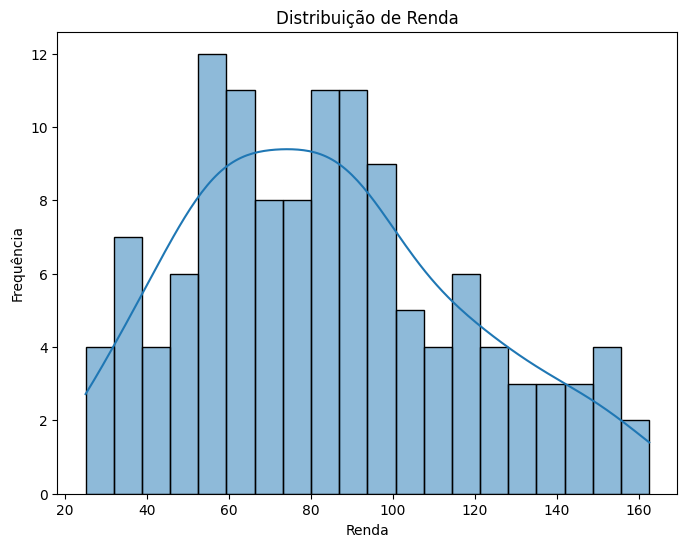

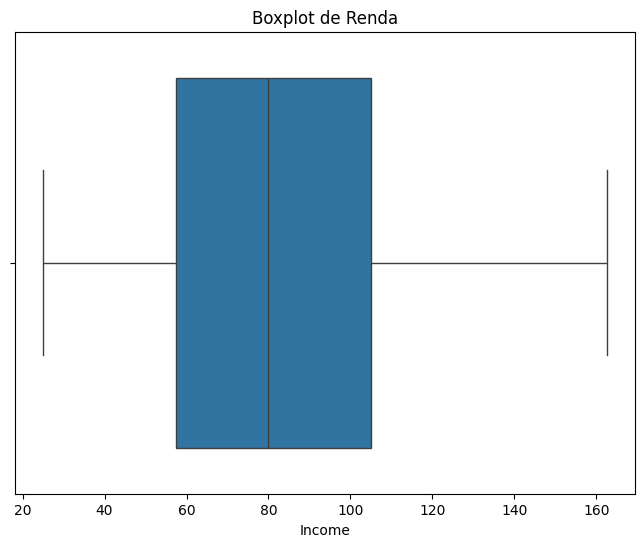

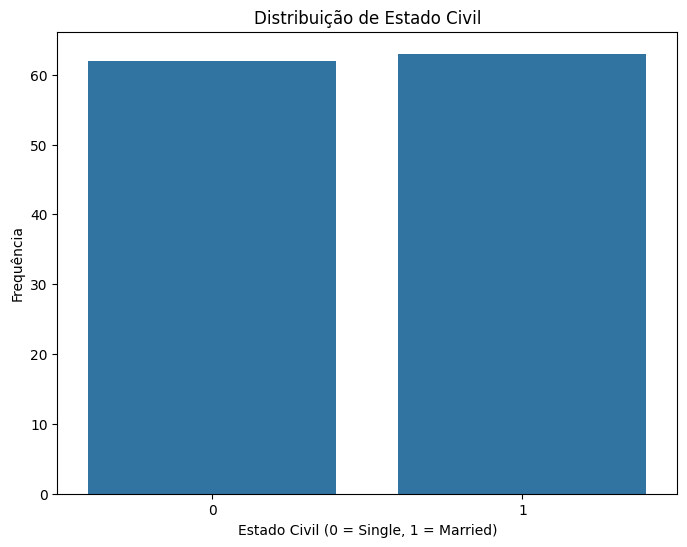

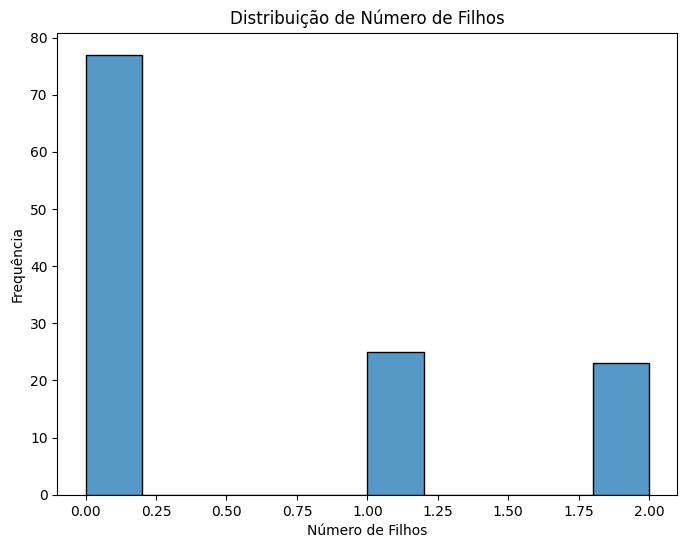

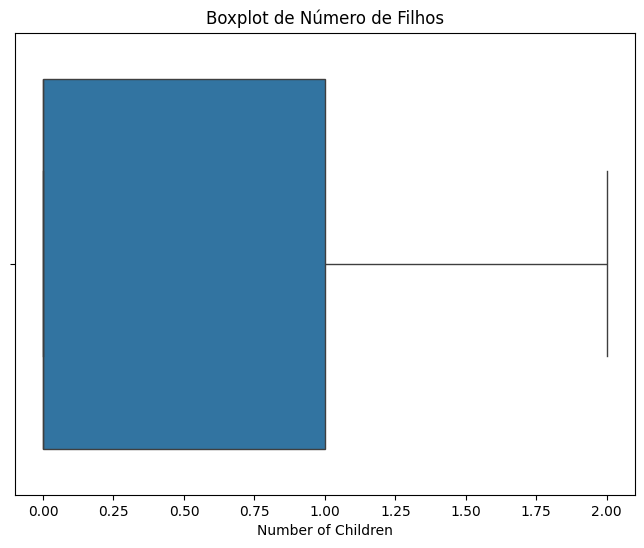

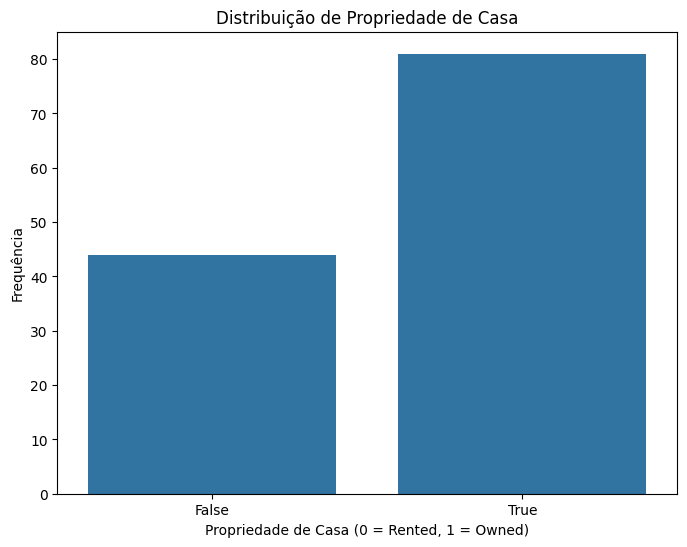

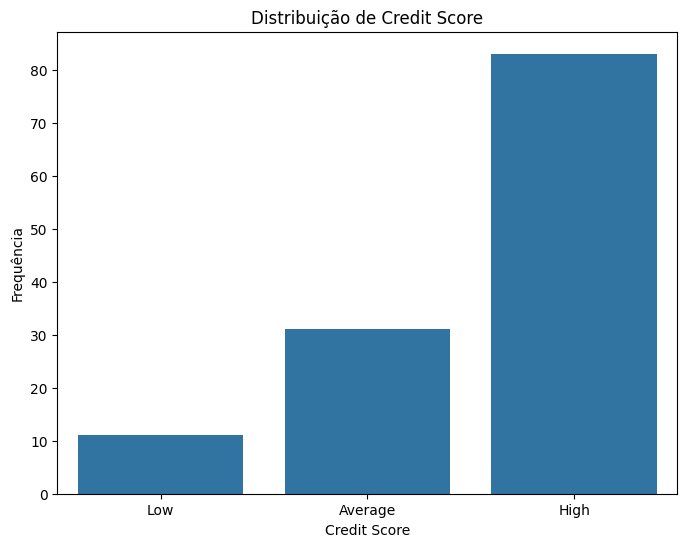

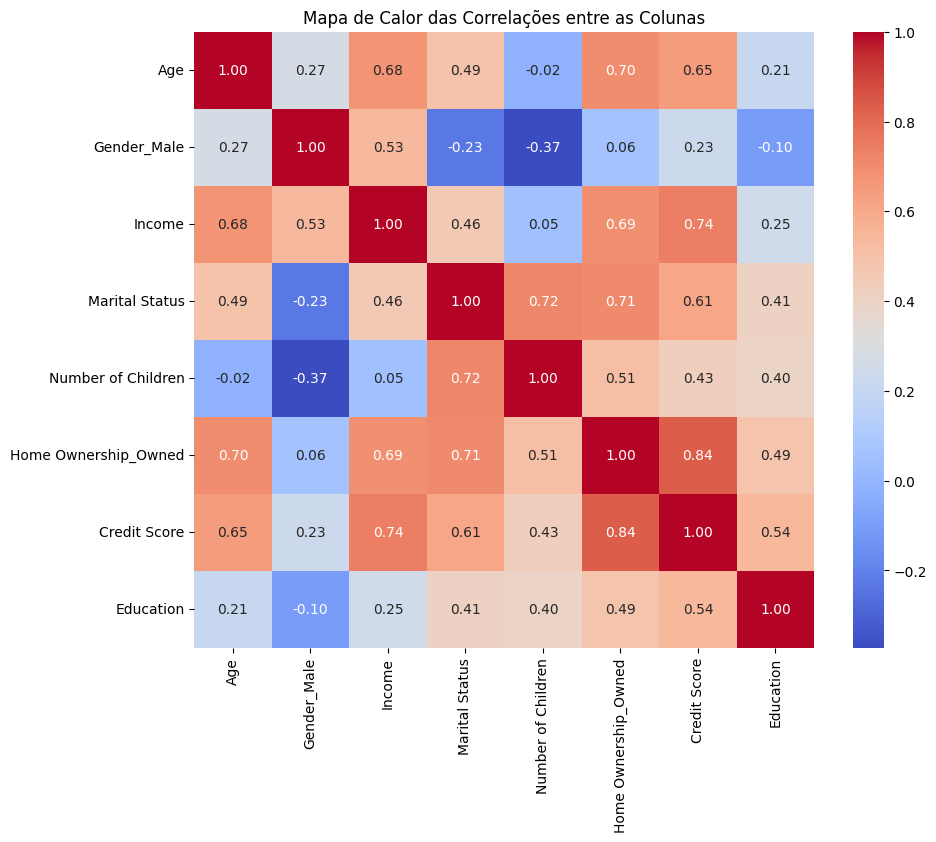

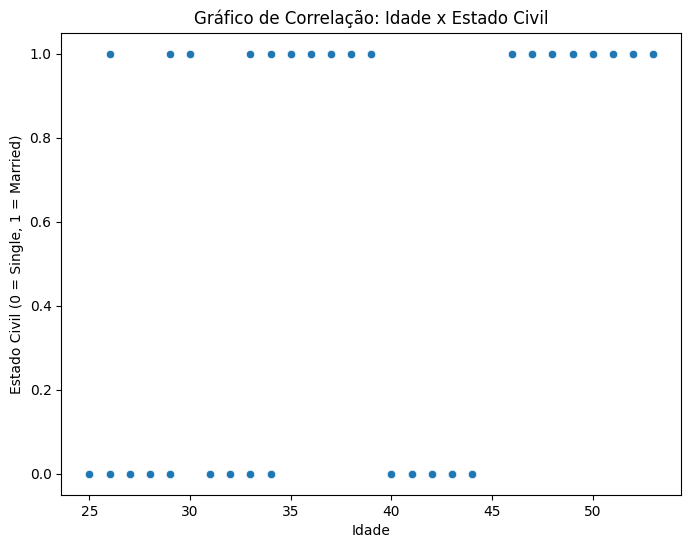

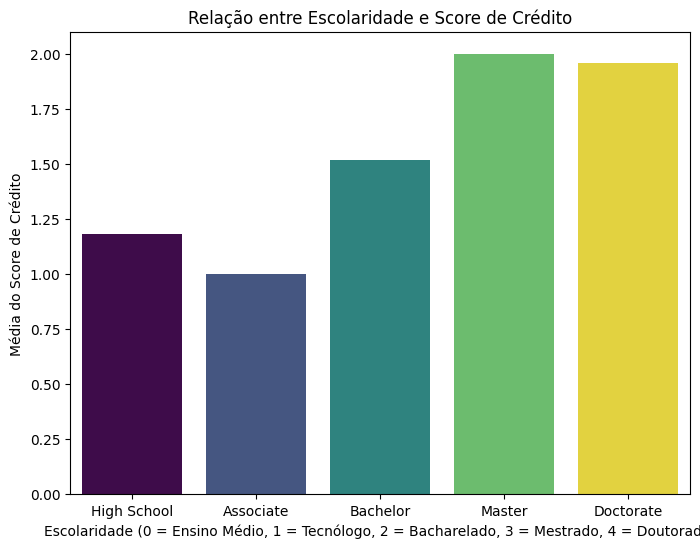

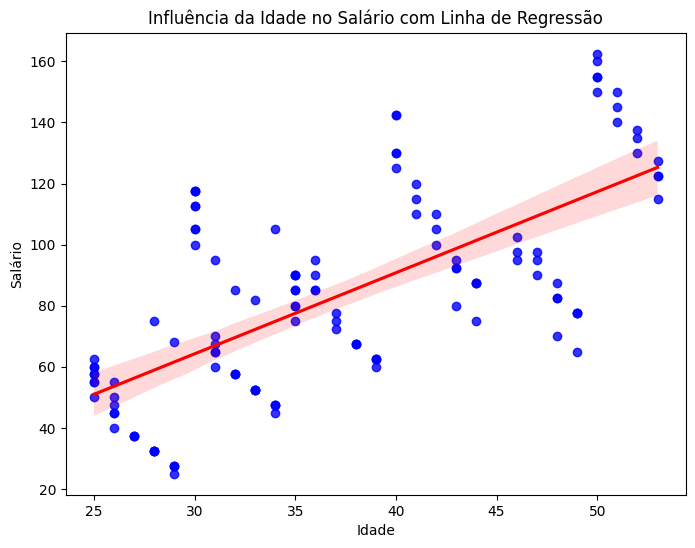

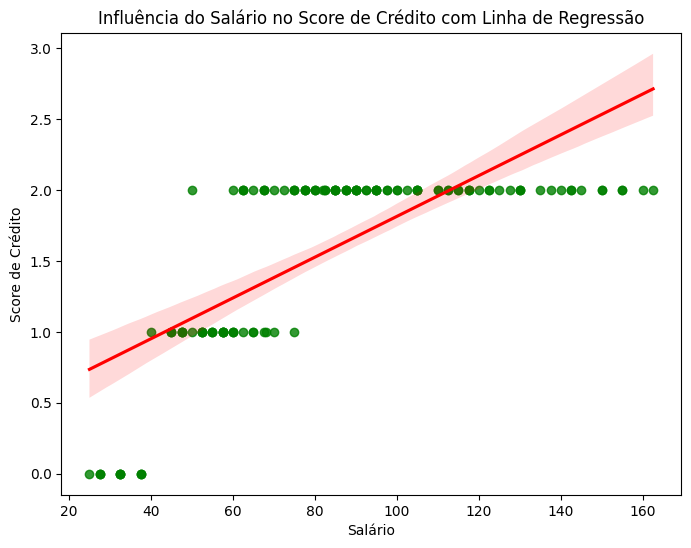

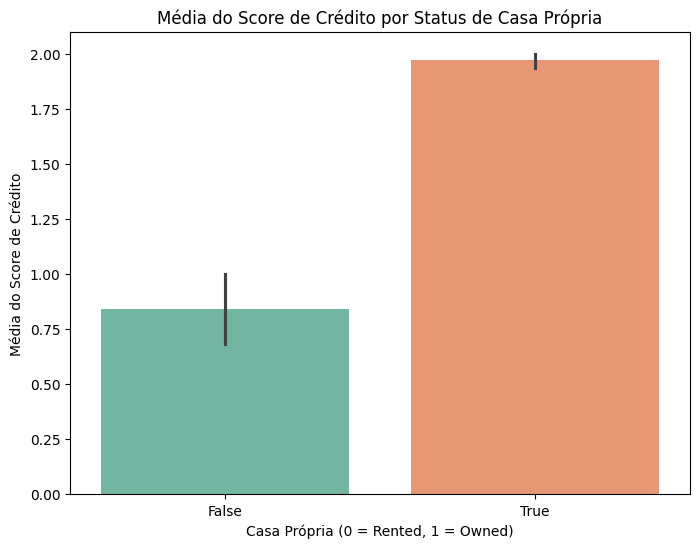

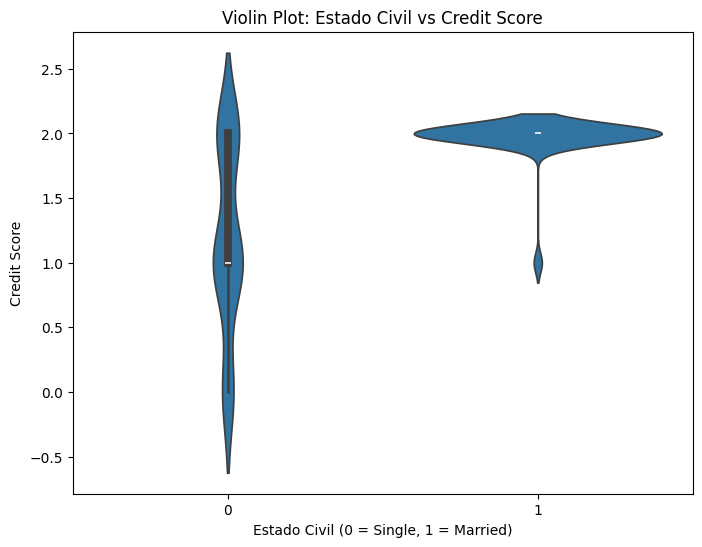

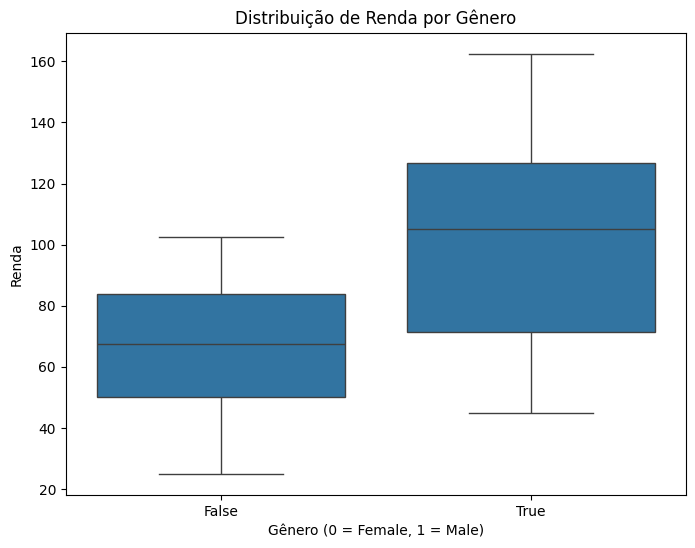

Distribuição das classes antes do SMOTE:
Credit Score
2    67
1    26
0     7
Name: count, dtype: int64

Distribuição das classes após o SMOTE:
Credit Score
2    67
1    67
0    67
Name: count, dtype: int64
Acurácia: 0.96

Matriz de Confusão:
[[ 4  0  0]
 [ 0  5  0]
 [ 0  1 15]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.94      0.97        16

    accuracy                           0.96        25
   macro avg       0.94      0.98      0.96        25
weighted avg       0.97      0.96      0.96        25



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Definir comportamento futuro para evitar warnings no replace
pd.set_option('future.no_silent_downcasting', True)

# 1. Carregar o arquivo CSV e configurar a exibição
df = pd.read_csv(r'C:\Users\lucas\Downloads\CREDIT_SCORE_PROJETO_PARTE1.csv', delimiter=';')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Processamento dos dados
df = df.dropna(subset=['Age'])
missing_percentage = df.isnull().mean() * 100
print("Porcentagem de dados faltantes por coluna:\n", missing_percentage)

df['Income'] = pd.to_numeric(df['Income'].replace({'\\$': '', ',': ''}, regex=True), errors='coerce')
df['Credit Score'] = df['Credit Score'].str.strip().str.lower()
df['Credit Score'] = df['Credit Score'].replace({'low': 0, 'average': 1, 'high': 2})
credit_map = {0: 'Low', 1: 'Average', 2: 'High'}
df['Credit Score Label'] = df['Credit Score'].replace(credit_map)
df['Marital Status'] = df['Marital Status'].replace({'Single': 0, 'Married': 1}).astype(int)
education_mapping = {
    "High School Diploma": 0,
    "Associate's Degree": 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    "Doctorate": 4
}
df['Education'] = df['Education'].replace(education_mapping).astype(int)
df = df[df['Number of Children'] != 3]
# Analisando os dados, percebi que a coluna Age tinha o maior número de dados faltantes e caso substituísse pela moda ou média ou mediana, enviezaria a pesquisa, então decidi apagar, pois só representavam cerca de 10% dos dados brutos.
# Também decidi apagar outliers que apareciam na coluna Number of Childs pois representavam uma quantidade ínfima dos dados.

# Converter variáveis nominais para categorias com ordem definida:
df['Gender'] = pd.Categorical(df['Gender'], categories=["Female", "Male"], ordered=True)
df['Home Ownership'] = pd.Categorical(df['Home Ownership'], categories=["Rented", "Owned"], ordered=True)
df = pd.get_dummies(df, columns=['Gender', 'Home Ownership'], drop_first=True)
# Em seguida eu tranformei todas as váriaveis nominais em numéricas, e já usei o label encoder para várieaveis que tem uma certa ordem ordinal crescente, como Education e One-Hot Encoder para váriaveis sem ordem como Gender.

# Análises Univariadas

print("Estatísticas Descritivas de Age:")
print(df['Age'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()
# De maneira geral nosso público alvo é maias forte até os 40 anos em média.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot de Idade')
plt.show()
# Especificamente entre 30 e 45 anos nossa frequência é maior.

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Male', data=df)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero (0 = Female, 1 = Male)')
plt.ylabel('Frequência')
plt.show()
# Dentro de nossos clientes,existe uma ligeira maioria feminina, mas quase imperceptível, no geral é bem equilibrado.

plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True, bins=20)
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot de Renda')
plt.show()
# A maioria de nossos clientes tem uma renda média anual de 60 a 100 mil.
 
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Distribuição de Estado Civil')
plt.xlabel('Estado Civil (0 = Single, 1 = Married)')
plt.ylabel('Frequência')
plt.show()
# Observamos uma pequena maioria de casados entre nossos clientes.

plt.figure(figsize=(8, 6))
sns.histplot(df['Number of Children'], kde=False, bins=10)
plt.title('Distribuição de Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Number of Children'])
plt.title('Boxplot de Número de Filhos')
plt.show()
# A maioria absoluta de nossos clientes não tem filhos, a outra metade se separa entre 1 e 2 fihos, o que leva nossa média para 1 filho.

plt.figure(figsize=(8, 6))
sns.countplot(x='Home Ownership_Owned', data=df)
plt.title('Distribuição de Propriedade de Casa')
plt.xlabel('Propriedade de Casa (0 = Rented, 1 = Owned)')
plt.ylabel('Frequência')
plt.show()
# A maioria dos nossos clientes tem casa prórpria.

plt.figure(figsize=(8, 6))
sns.countplot(x='Credit Score Label', data=df, order=['Low', 'Average', 'High'])
plt.title('Distribuição de Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')
plt.show()
# A maior parte de nossos clientes tem um ScoreCredit Alto, seguido dos que tem score médio e por último score baixo.

# Mapa de Calor
colunas = ['Age', 'Gender_Male', 'Income', 'Marital Status', 'Number of Children', 'Home Ownership_Owned', 'Credit Score', 'Education']
matriz_correlacao = df[colunas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações entre as Colunas')
plt.show()
# Age - Income
# Age - Home Ownership_Owned
# Age - Credit Score
# Gender_Male - Income
# Income - Home Ownership_Owned
# Income - Credit Score
# Marital Status - Number of Children
# Marital Status - Home Ownership_Owned
# Marital Status - Credit Score
# Home Ownership_Owned - Credit Score
# Credit Score - Education
#Essas são as correlações mais fortes, geralmente começando com 0.6 de correlação, exceto (education) que a correlação mais clara foi com Credit Score.

# Análises Bivariadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Marital Status', data=df)
plt.title('Gráfico de Correlação: Idade x Estado Civil')
plt.xlabel('Idade')
plt.ylabel('Estado Civil (0 = Single, 1 = Married)')
plt.show()
# Exceto dos 40 a 45 anos, quanto mais a idade avança, mas tem chance de nossos clientes serem casados.

plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Credit Score', data=df, errorbar=None, hue='Education', palette='viridis', legend=False)
plt.title('Relação entre Escolaridade e Score de Crédito')
plt.xlabel('Escolaridade (0 = Ensino Médio, 1 = Tecnólogo, 2 = Bacharelado, 3 = Mestrado, 4 = Doutorado)')
plt.ylabel('Média do Score de Crédito')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["High School", "Associate", "Bachelor", "Master", "Doctorate"])
plt.show()
# Quanto maior o nível educacional, maior o Crédito é entre nossos clientes.

plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Influência da Idade no Salário com Linha de Regressão')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()
# As tendências nos mostram que provavelmente quanto mais velhos nossos clientes forem, maior é o salário deles.

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.regplot(x='Income', y='Credit Score', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Influência do Salário no Score de Crédito com Linha de Regressão')
plt.xlabel('Salário')
plt.ylabel('Score de Crédito')
plt.show()
# O Score de Crédito tende a subir com o salário.

plt.figure(figsize=(8, 6))
sns.barplot(x='Home Ownership_Owned', y='Credit Score', data=df, hue='Home Ownership_Owned', palette='Set2', legend=False)
plt.title('Média do Score de Crédito por Status de Casa Própria')
plt.xlabel('Casa Própria (0 = Rented, 1 = Owned)')
plt.ylabel('Média do Score de Crédito')
plt.show()
# Clientes com casa própria tendem a ter a média de score mais de 50% mais alto que os que não possuem uma casa própria.

plt.figure(figsize=(8,6))
sns.violinplot(x='Marital Status', y='Credit Score', data=df)
plt.title('Violin Plot: Estado Civil vs Credit Score')
plt.xlabel('Estado Civil (0 = Single, 1 = Married)')
plt.ylabel('Credit Score')
plt.show()
# A maior densidade dos nossos clientes casados está no score mais alto, enquanto nossos clientes solteiros estão espalhados por todo o gráfico.

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender_Male', y='Income', data=df)
plt.title('Distribuição de Renda por Gênero')
plt.xlabel('Gênero (0 = Female, 1 = Male)')
plt.ylabel('Renda')
plt.show()
# Podemos ver que os homens ganham mais proporcionalmente que as mulheres.

# Selecionar as features e o target
X = df[['Age', 'Income', 'Marital Status', 'Number of Children', 'Education', 'Gender_Male', 'Home Ownership_Owned']]
y = df['Credit Score']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE somente no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
# Através da visualização dos gráficos anteriores, consegui perceber que o nosso target estava totalmente desbalanceado, então usamos o Smote para balancear, decidi usar o método oversampling para além de equiparar a quantidade entre as 3 variaveis, consegui aumentar o numero de dados para testar o nosso modelo com mais facilidade.

print("Distribuição das classes antes do SMOTE:")
print(y_train.value_counts())
print("\nDistribuição das classes após o SMOTE:")
print(pd.Series(y_train_sm).value_counts())

# Criar e treinar o modelo com o conjunto balanceado
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



